# RANDOM FOREST ASSIGNMENT | Water quality Dataset

## Introduction of the Dataset

The Water Quality Dataset contains 7,999 entries and 21 columns, focusing on various chemical and biological parameters affecting water quality. The dataset includes:

- Chemical Measurements: Attributes like aluminium, arsenic, barium, cadmium, chloramine, chromium, copper, fluoride, lead, nitrates, nitrites, mercury, perchlorate, radium, selenium, silver, and uranium, all measured in float64 format.
- Biological Measurements: Includes bacteria and viruses, also in float64 format.
- Target Variable: is_safe (object) indicates whether the water is deemed safe or not.

The is_safe column serves as the target variable for classification, while the other columns provide the features related to water contaminants. The dataset is suited for predicting water safety based on these parameters.

## Import Libraries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [82]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\waterQuality1.csv")
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Basic Information of dataset

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

## Summary of the dataset

In [84]:
df.describe(include='all')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7999,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999
unique,NaN,2564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7084
mean,0.666158,NaN,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,NaN
std,1.265145,NaN,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,NaN
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.040000,NaN,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,NaN
50%,0.070000,NaN,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,NaN
75%,0.280000,NaN,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,NaN


## Checking Missing values in DataFrame

In [85]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

## Encoding Categorical Variables


In [86]:
# Frequency Encoding for 'ammonia'
freq_encoding = df['ammonia'].value_counts().to_dict()
df['ammonia'] = df['ammonia'].map(freq_encoding)

# Convert 'is_safe' to numeric values, coercing errors to NaN
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')

# Handle missing values (e.g., by dropping or imputing)
df.dropna(subset=['is_safe'], inplace=True)  # Drop rows where 'is_safe' is NaN

# Convert 'is_safe' to integer (binary encoding)
df['is_safe'] = df['is_safe'].astype(int)

# Verify the changes
print(df['is_safe'].unique())

[1 0]


## Visualizations

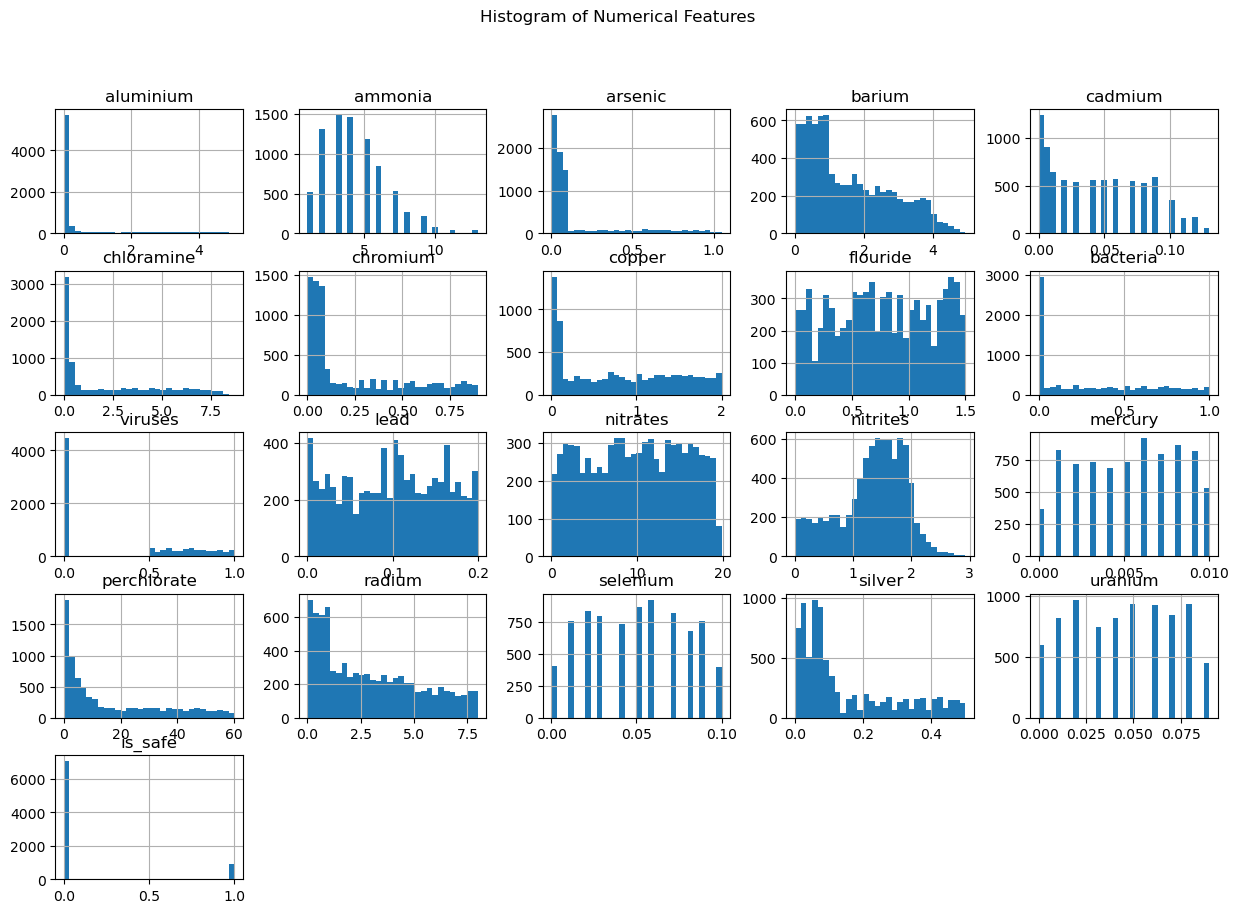

In [87]:
# Plot histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of Numerical Features')
plt.show()

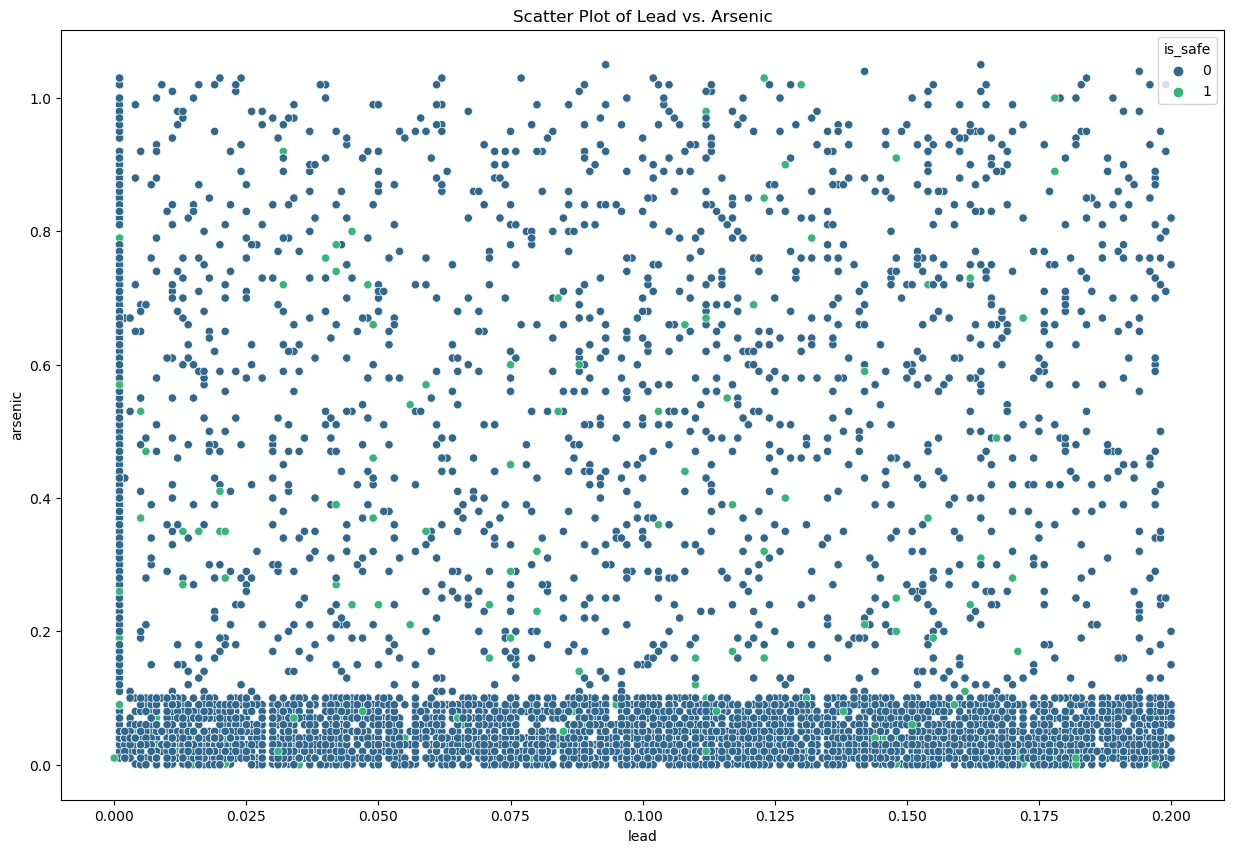

In [88]:
# Scatter plot between key features and the target variable
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='lead', y='arsenic', hue='is_safe', palette='viridis')
plt.title('Scatter Plot of Lead vs. Arsenic')
plt.show()

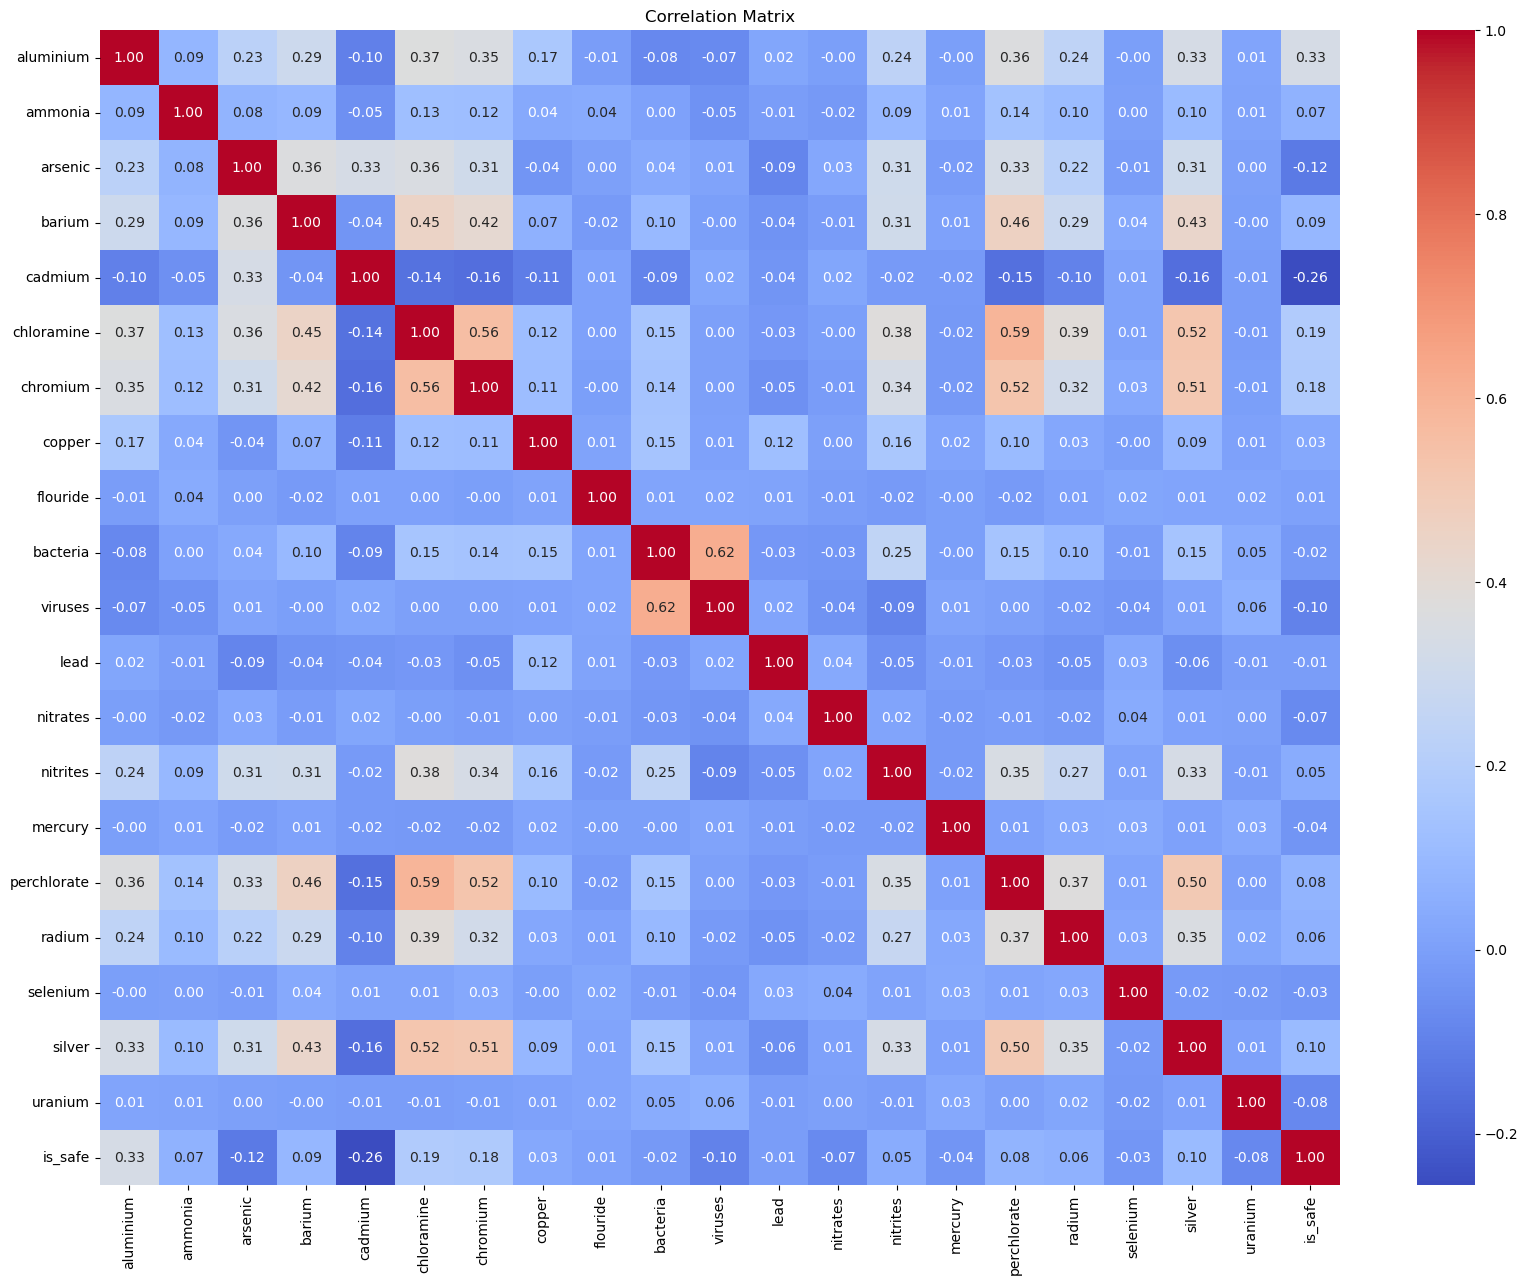

In [89]:
# Compute correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Histograms: Examine the distribution of each numerical feature.
- Scatter Plots: Analyze relationships between key features and the target variable is_safe.
- Correlation Matrix: Explore correlations between features to identify important relationships.

## Standardization

In [90]:
from sklearn.preprocessing import StandardScaler

# Split the dataset into features and target variable
X = df.drop(['is_safe'], axis=1)
y = df['is_safe']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [91]:
X_scaled

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,0.777403,-0.578386,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-1.657446,-0.363345,-0.869387,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.917040
1,1.306945,-0.124888,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,1.002460,0.849782,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023
2,0.271572,-0.124888,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,0.501507,-0.818614,-0.861452,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.035310,-1.288728
3,0.548198,0.782108,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,0.708215,1.184567,1.008475,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,-1.031700,2.104968,0.198023
4,0.200439,-0.578386,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.371261,-0.575804,-0.866742,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.031700,-0.611672,-0.917040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,-0.487175,-0.578386,-0.639217,0.314165,-0.077771,-0.809330,-0.802892,-1.187263,1.374275,-0.970370,-0.869387,1.677459,0.806757,-0.575412,-0.064914,-0.729052,-0.340173,1.401260,-0.611672,-0.545353
7992,-0.487175,-0.578386,-0.560046,-0.804117,-0.910016,-0.672986,-0.839840,-1.202564,1.626919,-0.970370,-0.869387,-1.176498,0.081339,-0.575412,-1.413097,-0.847213,-0.779325,1.401260,-0.333042,1.313085
7993,-0.455561,-0.578386,-0.639217,-0.787672,-0.355186,-0.828807,-0.728995,-1.202564,0.317766,-0.970370,-0.869387,1.419571,1.100895,-0.575412,-1.750143,-0.854563,0.826593,-1.726831,-0.750986,0.198023
7994,-0.518790,-1.485382,-0.599632,0.355278,-1.187431,-0.069180,-0.913738,-1.095458,-1.772284,-0.970370,-0.869387,-1.709466,-1.771906,-2.319897,-1.750143,-0.930887,-1.257225,-1.726831,-1.029616,-1.660415


In [92]:
y

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7996, dtype: int32

## Splitting the Dataset

In [93]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6396, 20) (6396,)
Testing set shape: (1600, 20) (1600,)


- train_test_split: Splits the dataset into training and testing sets. Here, 20% of the data is used for testing, and the remaining 80% is used for training.
- Random State: Ensures that the split is reproducible.

## Loading the Random Forest Model

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with the chosen hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth= 10  ,
    min_samples_split= 2,
    min_samples_leaf= 1,
    criterion= 'gini',
    random_state=42
)

- Number of Trees (n_estimators): The number of trees in the forest. More trees generally improve performance but increase computation time. Common values range from 100 to 500.
- Maximum Depth (max_depth): The maximum depth of each tree. Limiting the depth can help prevent overfitting. Common values are between 10 and 50.
- Minimum Samples per Leaf (min_samples_leaf): The minimum number of samples required to be at a leaf node. Setting this parameter helps to control overfitting. Common values are between 1 and 10.
- Minimum Samples per Split (min_samples_split): The minimum number of samples required to split an internal node. This can also help to prevent overfitting. Common values are between 2 and 10.
- Splitting Criteria (criterion): The function to measure the quality of a split. Options include 'gini' for the Gini impurity and 'entropy' for the information gain.

# Train the model on the Training Data

In [95]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## Make predictions on the Test Data

In [96]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

## Calculate evaluation metrics

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print metrics
print("\nAccuracy Score:", accuracy)
print("Precision Scores:", precision)
print("Recall Scores:", recall)
print("F1 Scores:", f1)


Accuracy Score: 0.948125
Precision Scores: [0.95320028 0.89795918]
Recall Scores: [0.98928571 0.66      ]
F1 Scores: [0.97090782 0.76080692]


- Accuracy Score: Indicates the overall correctness of the model.
- Precision Scores: Show how many of the predicted positives are actually positive, useful for evaluating false positives.
- Recall Scores: Indicate how many of the actual positives were correctly identified, useful for evaluating false negatives.
- F1 Scores: Provide a single metric balancing precision and recall, especially useful when you have class imbalances.

## Confusion Matrix

In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1385   15]
 [  68  132]]


- Confusion Matrix: Shows the true positive, false positive, true negative, and false negative counts. This helps in understanding the types of errors made by the model.

## Classification Report

In [99]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1400
           1       0.90      0.66      0.76       200

    accuracy                           0.95      1600
   macro avg       0.93      0.82      0.87      1600
weighted avg       0.95      0.95      0.94      1600



- Classification Report: Provides precision, recall, F1-score, and support for each class. Precision is the ratio of correctly predicted positive observations to the total predicted positives. Recall (or Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class. F1-score is the weighted average of Precision and Recall.

## Analyze Feature Importance

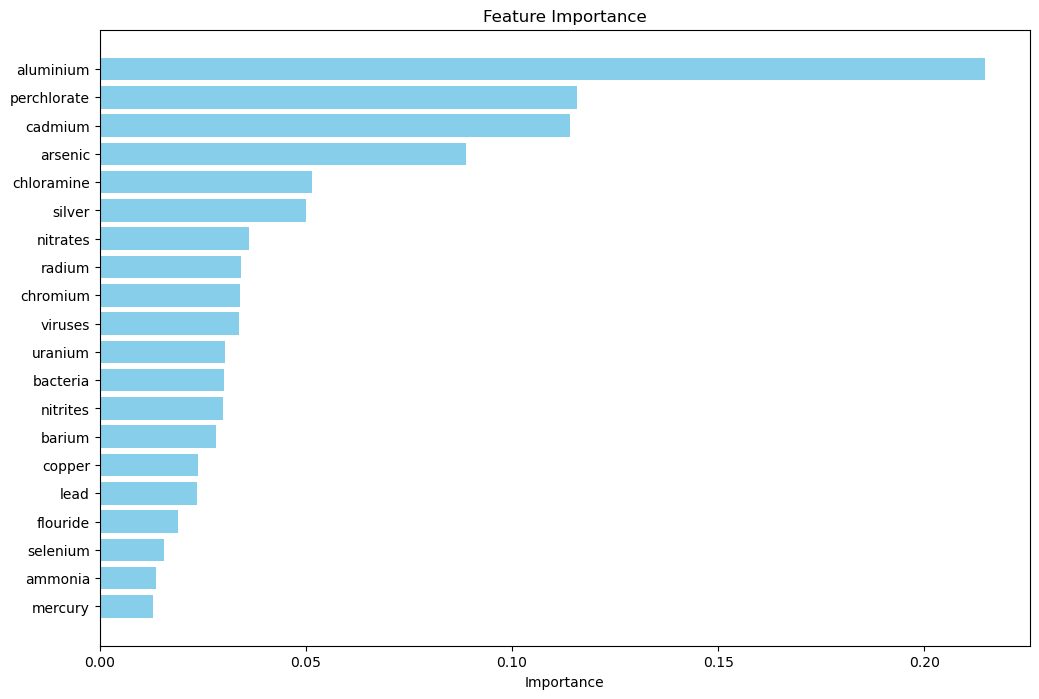

        Feature  Importance
0     aluminium    0.214789
15  perchlorate    0.115716
4       cadmium    0.114013
2       arsenic    0.088939
5    chloramine    0.051566
18       silver    0.049904
12     nitrates    0.036155
16       radium    0.034330
6      chromium    0.033994
10      viruses    0.033712
19      uranium    0.030406
9      bacteria    0.030172
13     nitrites    0.029929
3        barium    0.028165
7        copper    0.023771
11         lead    0.023631
8      flouride    0.018866
17     selenium    0.015515
1       ammonia    0.013530
14      mercury    0.012895


In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Print feature importances
print(importance_df)


- Use feature_importances_ from the Random Forest model to understand which features are most impactful.
- This provides a ranking of features based on their contribution to the model’s predictions. Features with higher importance values have more influence on the outcome.
- Bar Plot: Visualizes the importance of each feature, making it easier to see which features are most and least significant.

## Hyperparameter Tuning with Grid Search

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Best model
best_rf_model = grid_search.best_estimator_

# Validate the best model on test data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred_best = best_rf_model.predict(X_test)
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9499688477326036
Confusion Matrix (Best Model):
 [[1386   14]
 [  55  145]]

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1400
           1       0.91      0.72      0.81       200

    accuracy                           0.96      1600
   macro avg       0.94      0.86      0.89      1600
weighted avg       0.96      0.96      0.95      1600


Accuracy Score (Best Model): 0.956875


- Parameter Grid (param_grid): Define a dictionary where keys are hyperparameters to tune (max_depth, min_samples_leaf, criterion), and values are lists of possible values to try.
- GridSearchCV: Instantiate GridSearchCV with the DecisionTreeClassifier model (tree_clf), param_grid, cross-validation (cv=5), and scoring metric (scoring='accuracy').
- Fit Grid Search: Fit GridSearchCV on the training data (X_train, y_train) to find the best combination of hyperparameters.
- Best Parameters and Score: Print the best parameters found (grid_search.best_params_) and the corresponding cross-validation accuracy (grid_search.best_score_).
- Evaluate Optimized Model: Use the best model found (best_tree_clf) to predict on the test data (X_test) and evaluate its accuracy.

## Cross-Validation Techniques

In [102]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.94921875 0.95230649 0.94917905 0.94917905 0.94996091]
Mean Cross-Validation Score: 0.9499688477326036


- cross_val_score: Use cross_val_score to perform k-fold cross-validation (cv=5 by default) on the optimized model (best_tree_clf) and compute accuracy scores for each fold.

- Cross-validation Scores: Print the cross-validation scores for each fold (cv_scores) and compute the mean accuracy across all folds (cv_scores.mean()).

# Summary

- After applying and optimizing the Random Forest model for the Water Quality dataset, the final model achieved an impressive accuracy of 95.7% and a best cross-validation score of 94.9%. Key features influencing water safety were identified as aluminium, perchlorate, and cadmium.
- The model's precision and recall metrics indicated strong performance in distinguishing between safe and unsafe water, with a high accuracy of 96% and effective feature importance analysis confirming the model's reliability for practical water quality assessment.